In [26]:
import pandas as pd
import time
from flask import current_app
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import numpy as np
import math

In [27]:
# Add working directory
import os
os.chdir("C:/Users/Swati Arora/Data Science using Python/Movie Recommender System- Pybots")

In [28]:
genre_matrix=pd.read_csv("genre_matrix.csv",sep=',', encoding='latin-1')
genre_matrix.head()

,Unnamed: 0,MovieID,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,3,4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,4,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
a=genre_matrix[genre_matrix > 0 ].count()

In [30]:
#a=genre_matrix1[genre_matrix1 > 0 ].count()

In [31]:
b=pd.DataFrame(a)

In [32]:
b['Genre']=b.index

b.columns=['Count','Genre']
b.count()

Count    20
Genre    20
dtype: int64

In [33]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
# use the code below to make sure plot is shown in Notebook
%matplotlib inline 


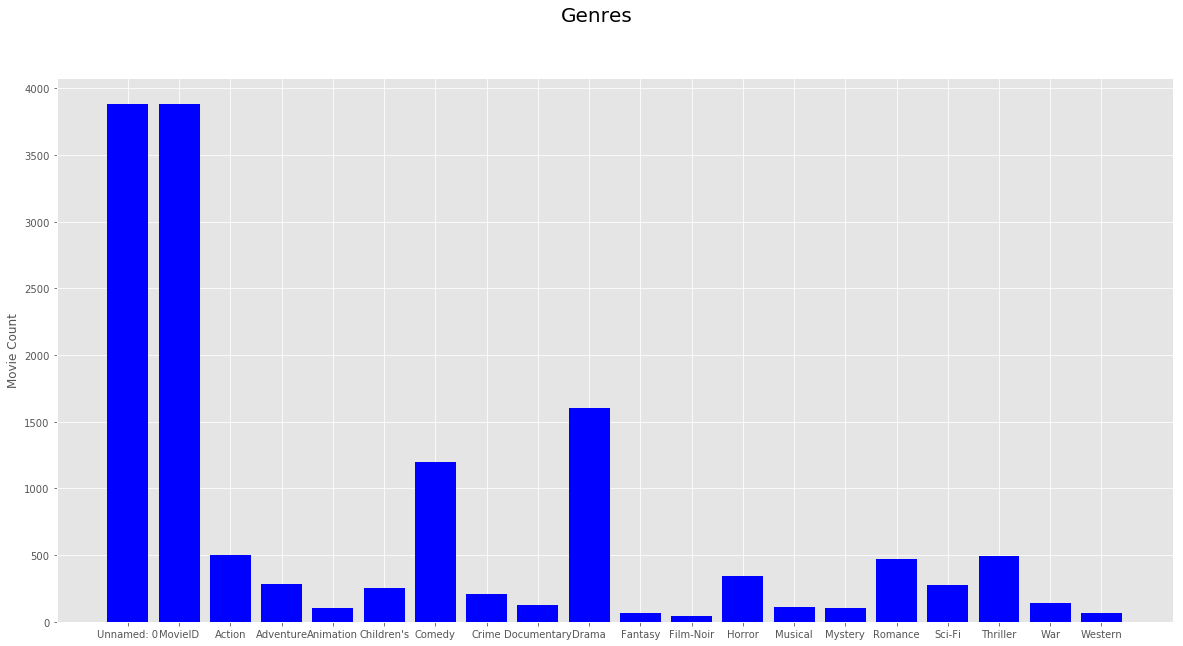

In [34]:
xlabel=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
labels=b.Genre


plt.figure(figsize=(20,10))

plt.bar(xlabel,b.Count,align='center',color='b')
plt.title=('Genres')

plt.xticks(xlabel, labels)
plt.ylabel('Movie Count')


plt.suptitle('Genres',fontsize=20)
plt.show()

In [35]:
#df = pd.read_csv("ratings.dat",sep=',')
os.chdir("C:/Users/Swati Arora/Data Science using Python/Movie Recommender System- Pybots/Data")
df = pd.read_csv('ratings.dat',sep='::', encoding='latin-1', names=['UserID','MovieID','Rating','Timestamp'])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
df.Rating.value_counts()

4    348971
3    261197
5    226310
2    107557
1     56174
Name: Rating, dtype: int64

In [37]:
df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


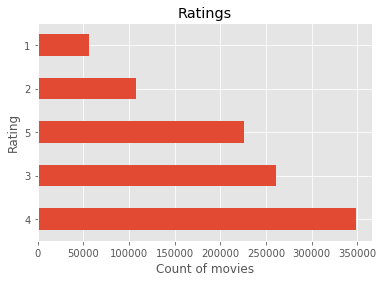

In [38]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
# use the code below to make sure plot is shown in Notebook
%matplotlib inline 

ax=df.Rating.value_counts().plot(kind='barh',title='Ratings')

ax.set_xlabel("Count of movies")
ax.set_ylabel("Rating")